<a href="https://colab.research.google.com/github/ismetMeray/MachineLearning-CBYTE/blob/main/CBYTE%20ML%20Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and variables

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pow
import csv
from collections import Counter
import pandas as pd


df = pd.read_csv('/content/Custom data set 2.csv', quotechar='"', sep=';')
allPlaylistNames = []
track = {}
dataPoints = {}
all_plalist_names = df['pname'].unique()

#popPunk
# new_point = [0.434, 0.897]

#house
new_point = [0.847, 0.69]

#Dnb
# new_point = [0.789, 0.859]
# new_point = [0.45, 0.949]

df.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,0.191170,0.627460,0.697025,0.273093,5.422222,0.184547,-8.205579,0.109502,129.470737,3.946032,0.433631
std,0.311333,0.158952,0.277448,0.381342,3.616777,0.142214,7.278514,0.104421,30.973127,0.312602,0.247544
min,0.000007,0.179000,0.002900,0.000000,0.000000,0.021700,-40.436000,0.023800,56.068000,1.000000,0.032700
25%,0.004280,0.510000,0.596000,0.000000,2.000000,0.096500,-8.244000,0.042300,103.040000,4.000000,0.218000
50%,0.037400,0.641000,0.775000,0.000877,6.000000,0.121000,-6.037000,0.061000,129.965000,4.000000,0.411000
75%,0.204000,0.754000,0.909000,0.711000,8.000000,0.242000,-4.344000,0.136000,150.096000,4.000000,0.622000
max,0.996000,0.950000,0.999000,0.986000,11.000000,0.948000,3.108000,0.595000,216.020000,5.000000,0.973000


Setup Data

In [ ]:
# print(df.loc[df['pname'] == 'Latin']['danceability'])

for playlistName in all_plalist_names:
    playlistLoc = df.loc[df['pname'] == playlistName]
    list = []
    for i in range(0, len(playlistLoc)):
        # if(playlistLoc.iloc[i]['danceability'] == new_point[0] and playlistLoc.iloc[i]['energy'] == new_point[1]):
        #     print(playlistLoc.iloc[i])
        point = [
            # playlistLoc.iloc[i]['acousticness'],
            playlistLoc.iloc[i]['danceability'],
            float(playlistLoc.iloc[i]['energy']),
            # playlistLoc.iloc[i]['instrumentalness'],
            # playlistLoc.iloc[i]['speechiness']
        ]
        list.append(point)
    dataPoints.update({playlistName: list})


Setup logic

In [ ]:


def euclidean_distance(p, q):
    return np.sqrt(np.sum((np.array(p) - np.array(q)) ** 2))

def cosine_similarity(vector1, vector2):
    dot_product = 0
    magnitude_vector1 = 0
    magnitude_vector2 = 0

    vector1_length = len(vector1)
    vector2_length = len(vector2)

    if vector1_length > vector2_length:
        vector2 = vector2 + [0] * (vector1_length - vector2_length)
    elif vector2_length > vector1_length:
        vector1 = vector1 + [0] * (vector2_length - vector1_length)

    for i in range(vector1_length):
        dot_product += vector1[i] * vector2[i]

    for i in range(vector1_length):
        magnitude_vector1 += np.power(vector1[i], 2)

    for i in range(vector2_length):
        magnitude_vector2 += np.power(vector2[i], 2)

    magnitude = np.sqrt(magnitude_vector1) * np.sqrt(magnitude_vector2)

    return dot_product / magnitude

class KNearestNeighbor:

    def __init__(self, k=3):
        self.k=k
        self.points = None

    def fit(self, points):
        self.points = points

    def predict(self, newPoint):
        distances = []

        for category in self.points:
            for point in self.points[category]:
                distance = euclidean_distance(point, newPoint)
                # distance = cosine_similarity(point, newPoint)
                distances.append([distance, category])

        #euclidean
        print(sorted(distances))
        categories = [category[1] for category in sorted(distances, reverse=False)[:self.k]]
        #cosine
        # categories = [category[1] for category in sorted(distances, reverse=True)[:self.k]]
        result = Counter(categories).most_common(5)[0][0]
        return result


clf = KNearestNeighbor(k=13)
clf.fit(dataPoints)
print(clf.predict(new_point))





[[0.0, 'House 2023'], [0.013038404810405309, 'Tribal Trap trap 2023'], [0.01772004514666926, 'House 2023'], [0.017888543819998284, "90's hiphop"], [0.0200997512422418, 'House 2023'], [0.02209072203437454, 'Latin'], [0.024020824298928538, "90's hiphop"], [0.02416609194718912, "90's hiphop"], [0.026172504656604714, 'Hip hop 2023'], [0.02687005768508883, 'Tribal Trap trap 2023'], [0.03036445290137798, 'Latin'], [0.03140063693621517, 'Hip hop 2023'], [0.03417601498127005, 'Latin'], [0.03492849839314597, 'Latin'], [0.0352278299076171, "90's hiphop"], [0.03605551275463986, 'House 2023'], [0.0362491379207837, 'House 2023'], [0.03640054944640263, "90's hiphop"], [0.03860051813123757, "90's hiphop"], [0.03996248240537615, 'House 2023'], [0.04049691346263311, 'Hip hop 2023'], [0.042520583250938555, "90's hiphop"], [0.04531004303683671, 'Latin'], [0.04716990566028291, 'Latin'], [0.04833218389437823, "90's hiphop"], [0.04883646178829909, 'Hip hop 2023'], [0.04939635614091382, 'Hip hop 2023'], [0.0

Visual

[[0.011704699910719636, 'Pop punk'], [0.012206555615733713, 'Pop punk'], [0.013038404810405309, 'Trancedente ervaringen'], [0.017262676501632084, 'Trancedente ervaringen'], [0.017691806012954073, 'Trancedente ervaringen'], [0.018248287590894564, 'Trancedente ervaringen'], [0.018384776310850254, 'Trancedente ervaringen'], [0.019026297590440465, 'Pop punk'], [0.01923538406167136, 'Trancedente ervaringen'], [0.01992485884517124, 'Pop punk'], [0.02262741699796954, 'Trancedente ervaringen'], [0.024186773244895616, 'Pop punk'], [0.026248809496813314, 'Trancedente ervaringen'], [0.02640075756488813, 'Trancedente ervaringen'], [0.02846049894151544, 'Pop punk'], [0.031016124838541617, 'Techno'], [0.032449961479175934, 'Tribal Trap trap 2023'], [0.03264965543462904, 'Pop punk'], [0.03275667870831834, 'Trancedente ervaringen'], [0.03328663395418641, 'Trancedente ervaringen'], [0.03499999999999992, 'Trancedente ervaringen'], [0.0352278299076171, 'Trancedente ervaringen'], [0.03847076812334272, 'Po

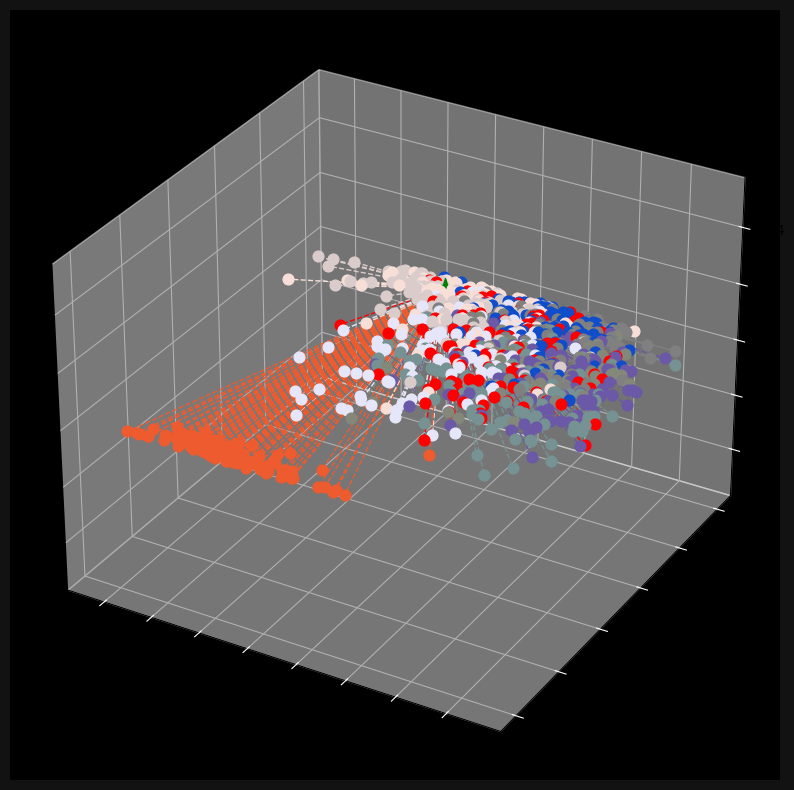

In [ ]:
#visualize

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
ax.grid(True, color='#323232')
ax.set_facecolor("black")
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', color='white')
ax.tick_params(axis='y', color='white')
ax.tick_params(axis='z', color='white')


for point in dataPoints['Techno']:

    ax.scatter(point[0], point[1], color='#104DCA', s=60)

for point in dataPoints['Tribal Trap trap 2023']:
    ax.scatter(point[0], point[1], color='#FF0000', s=60)

for point in dataPoints['Country best hits']:
    ax.scatter(point[0], point[1], color='#e6e6fa', s=60)

for point in dataPoints['Latin']:
    ax.scatter(point[0], point[1], color='#83887b', s=60)

for point in dataPoints["90's hiphop"]:
    ax.scatter(point[0], point[1], color='#6b58a7', s=60)

for point in dataPoints["Peacefull piano"]:
    ax.scatter(point[0], point[1], color='#ee5b2f', s=60)

for point in dataPoints["Pop punk"]:
    ax.scatter(point[0], point[1], color='#dbcccc', s=60)

for point in dataPoints["Hip hop 2023"]:
    ax.scatter(point[0], point[1], color='#769293', s=60)

for point in dataPoints["Trancedente ervaringen"]:
    ax.scatter(point[0], point[1], color='#f7dfd8', s=60)

for point in dataPoints["House 2023"]:
    ax.scatter(point[0], point[1], color='#808080', s=60)



new_class = clf.predict(new_point)
print(new_class)
color = None
if new_class == 'Techno':
    color = "#104DCA"
elif new_class == 'Tribal Trap trap 2023':
    color = '#FF0000'
elif new_class == 'Country best hits':
    color = '#e6e6fa'
elif new_class == 'Latin':
    color = '#83887b'
elif new_class == "90's hiphop":
    color = '#6b58a7'
elif new_class == 'Peacefull piano':
    color = '#ee5b2f'
elif new_class == 'Pop punk':
    color = '#dbcccc'
elif new_class == 'Hip hop 2023':
    color = '#769293'
elif new_class == 'Trancedente ervaringen':
    color = '#f7dfd8'
elif new_class == 'House 2023':
    color = '#808080'

color = '#008000'


ax.scatter(new_point[0], new_point[1], color=color, marker='*', s=200, zorder=1000)

for point in dataPoints['Techno']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#104DCA', linestyle='--', linewidth=1)

for point in dataPoints['Tribal Trap trap 2023']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#FF0000', linestyle='--', linewidth=1)

for point in dataPoints['Country best hits']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#e6e6fa', linestyle='--', linewidth=1)

for point in dataPoints['Latin']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]],color='#83887b', linestyle='--', linewidth=1)

for point in dataPoints["90's hiphop"]:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]],color='#6b58a7', linestyle='--', linewidth=1)

for point in dataPoints['Peacefull piano']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]],color='#ee5b2f', linestyle='--', linewidth=1)

for point in dataPoints['Pop punk']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#dbcccc', linestyle='--', linewidth=1)

for point in dataPoints['Hip hop 2023']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]],color='#769293', linestyle='--', linewidth=1)

for point in dataPoints['Trancedente ervaringen']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]],color='#f7dfd8', linestyle='--', linewidth=1)

for point in dataPoints['House 2023']:
    ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#808080',  linewidth=1)

plt.show()